# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,Holy See,Mauritania,Western Sahara,Burundi,Bhutan,Timor-Leste,Sao Tome and Principe,South Sudan,Papua New Guinea,Yemen
2020-04-09,461437,153222,143626,118781,118181,65872,82883,66220,42282,24983,...,8,7,4,3,5,1,4,3,2,0
2020-04-10,496535,158273,147577,125931,122171,74605,82941,68192,47029,26667,...,8,7,4,3,5,2,4,4,2,1
2020-04-11,526396,163027,152271,130727,124908,79874,83014,70029,52167,28018,...,8,7,4,5,5,2,4,4,2,1
2020-04-12,555313,166831,156363,133670,127854,85206,83134,71686,56956,29647,...,8,7,6,5,5,2,4,4,2,1
2020-04-13,580619,170099,159516,137875,130072,89570,83213,73303,61049,30589,...,8,7,6,5,5,4,4,4,2,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,Holy See,Mauritania,Western Sahara,Burundi,Bhutan,Timor-Leste,Sao Tome and Principe,South Sudan,Papua New Guinea,Yemen
2020-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-10,35098.0,5051.0,3951.0,7150.0,3990.0,8733.0,58.0,1972.0,4747.0,1684.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2020-04-11,29861.0,4754.0,4694.0,4796.0,2737.0,5269.0,73.0,1837.0,5138.0,1351.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-12,28917.0,3804.0,4092.0,2943.0,2946.0,5332.0,120.0,1657.0,4789.0,1629.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-13,25306.0,3268.0,3153.0,4205.0,2218.0,4364.0,79.0,1617.0,4093.0,942.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Iran,Belgium,China,Germany,Netherlands,...,Saint Kitts and Nevis,Laos,Eswatini,Eritrea,Rwanda,Equatorial Guinea,Dominica,Guinea-Bissau,Holy See,Nepal
2020-04-09,16478,18279,15447,12228,7993,4110,2523,3339,2607,2403,...,0,0,0,0,0,0,0,0,0,0
2020-04-10,18586,18849,16081,13215,8974,4232,3019,3340,2767,2520,...,0,0,0,0,0,0,0,0,0,0
2020-04-11,20463,19468,16606,13851,9892,4357,3346,3343,2736,2653,...,0,0,0,0,0,0,0,0,0,0
2020-04-12,22020,19899,17209,14412,10629,4474,3600,3343,3022,2747,...,0,0,0,0,0,0,0,0,0,0
2020-04-13,23529,20465,17756,14986,11347,4585,3903,3345,3194,2833,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Iran,Belgium,China,Germany,Netherlands,...,Saint Kitts and Nevis,Laos,Eswatini,Eritrea,Rwanda,Equatorial Guinea,Dominica,Guinea-Bissau,Holy See,Nepal
2020-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-10,2108.0,570.0,634.0,987.0,981.0,122.0,496.0,1.0,160.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-11,1877.0,619.0,525.0,636.0,918.0,125.0,327.0,3.0,-31.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-12,1557.0,431.0,603.0,561.0,737.0,117.0,254.0,0.0,286.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-13,1509.0,566.0,547.0,574.0,718.0,111.0,303.0,2.0,172.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [606]:
# plot globals?


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,Holy See,Mauritania,Western Sahara,Burundi,Bhutan,Timor-Leste,Sao Tome and Principe,South Sudan,Papua New Guinea,Yemen
2020-04-09,3.57,10.08,12.73,10.29,2.21,12.13,4.03,6.21,2.15,10.10,...,0.0,14.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-10,3.74,10.16,12.77,10.49,2.26,12.03,4.03,6.21,2.14,11.32,...,0.0,14.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-11,3.89,10.19,12.79,10.60,2.19,12.38,4.03,6.22,2.11,11.94,...,0.0,14.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-12,3.97,10.32,12.73,10.78,2.36,12.47,4.02,6.24,2.10,12.14,...,0.0,14.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-13,4.05,10.44,12.83,10.87,2.46,12.67,4.02,6.25,2.12,12.76,...,0.0,14.29,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0


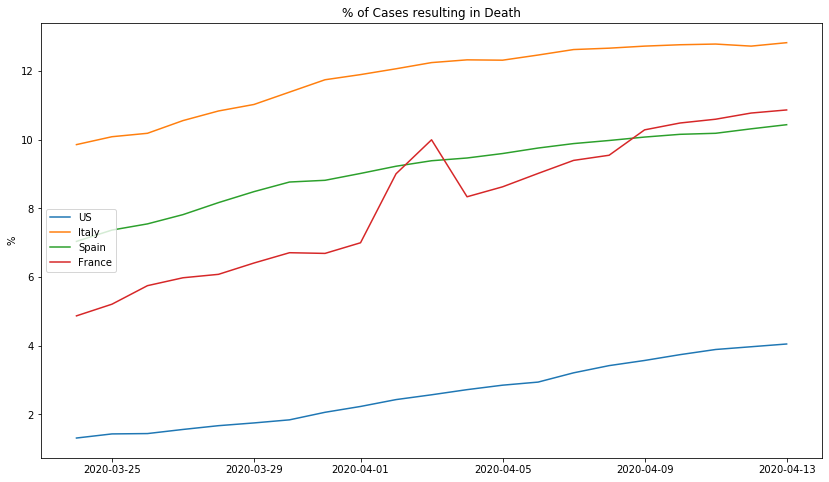

In [607]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-13 00:00:00 %
Country/Region,
Algeria,15.78
Italy,12.83
Belgium,12.76
United Kingdom,12.67
France,10.87
Netherlands,10.61
Spain,10.44
San Marino,9.83
Indonesia,8.76


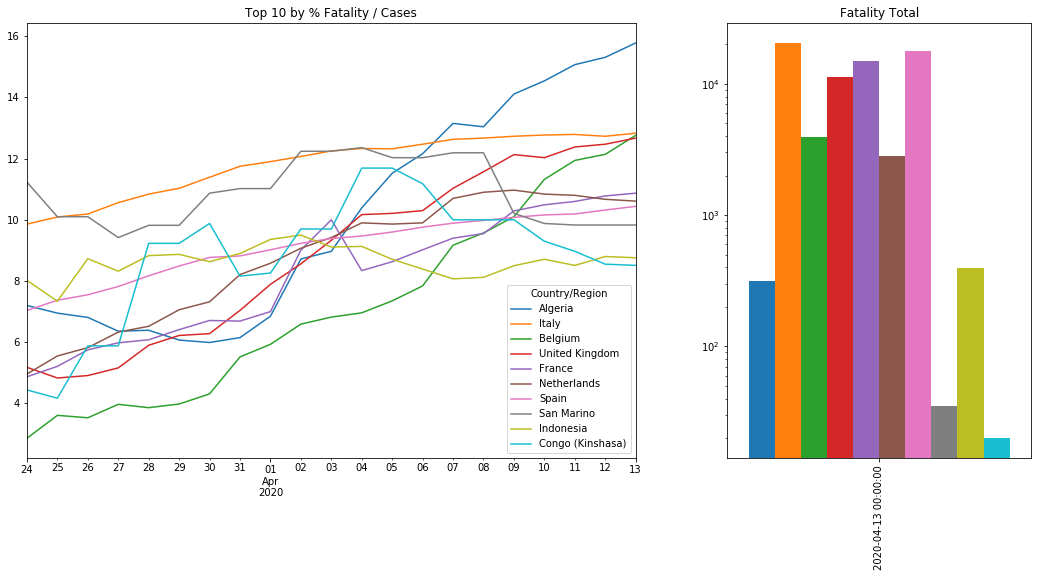

In [608]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [609]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-09,2789.820068,2776.989990,2818.570068,2762.360107,461437,66220,143626,153222,82883,4667,1549022
2020-04-10,2761.629883,2782.459961,2782.459961,2721.169922,496535,68192,147577,158273,82941,5530,1642797
2020-04-11,2761.629883,2782.459961,2782.459961,2721.169922,526396,70029,152271,163027,83014,6005,1720097
2020-04-12,2761.629883,2782.459961,2782.459961,2721.169922,555313,71686,156363,166831,83134,6748,1792616
2020-04-13,2761.629883,2782.459961,2782.459961,2721.169922,580619,73303,159516,170099,83213,7370,1860683


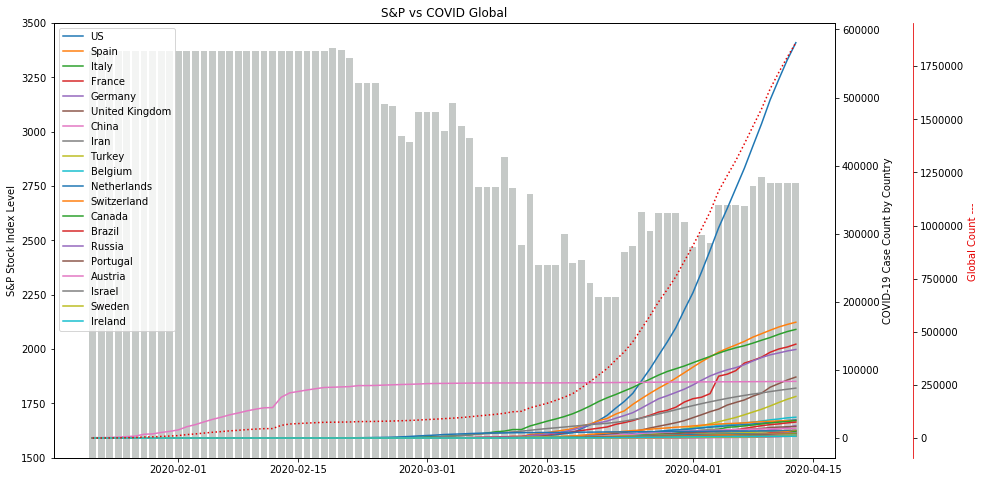

In [610]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

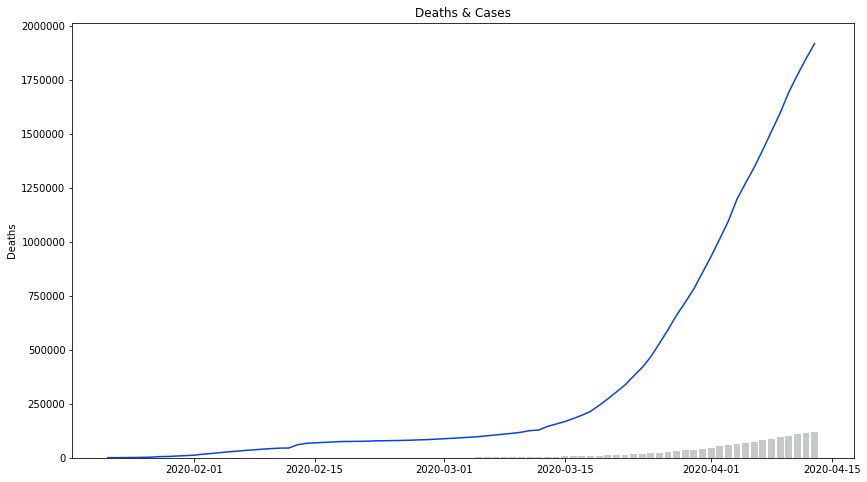

In [611]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [612]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])
display('top countries d', dfd_g2.sort_values(by=[dfd_g2.columns[-1]], ascending=False).head(3).iloc[:,-maxdays:])

'top countries'

,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13
Country/Region,,,,,,,,,,
US,308853,337072,366667,396223,429052,461437,496535,526396,555313,580619
Spain,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099
Italy,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516
France,90848,93773,98963,110065,113959,118781,125931,130727,133670,137875
Germany,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072
United Kingdom,42477,48436,52279,55949,61474,65872,74605,79874,85206,89570
China,82543,82602,82665,82718,82809,82883,82941,83014,83134,83213
Iran,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303
Turkey,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049


'top countries d'

,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13
Country/Region,,,,,,,,,,
US,8407,9619,10783,12722,14695,16478,18586,20463,22020,23529
Italy,15362,15887,16523,17127,17669,18279,18849,19468,19899,20465
Spain,11947,12641,13341,14045,14792,15447,16081,16606,17209,17756


## Random analysis of various countries

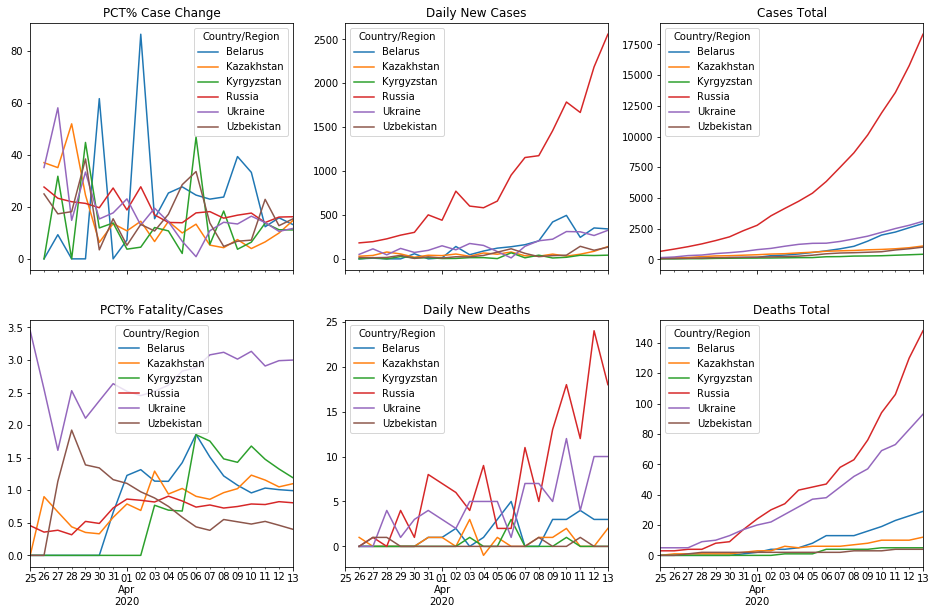

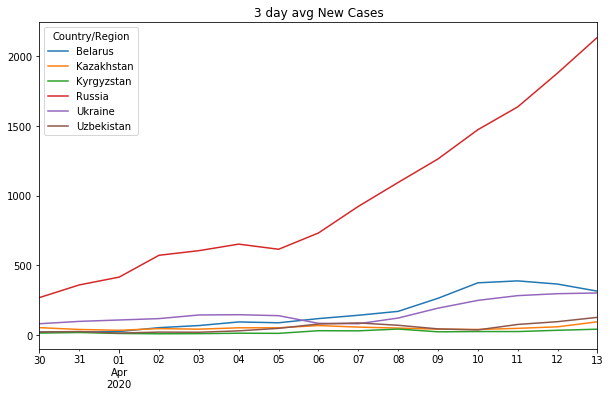

In [624]:
# ad hoc overlays
countries = ['Japan','Singapore','Thailand','Vietnam','India','Korea, South','Pakistan']
countries = ['Russia','Ukraine','Belarus','Kazakhstan','Uzbekistan','Kyrgyzstan']
maxdays = 20

fig, axs = plt.subplots(2,3, figsize=(16, 10), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Daily New Cases')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Cases Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality/Cases')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Daily New Deaths')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Deaths Total')
plt.show()


roll = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().rolling(3, axis=0).mean().round(0)
roll.tail(maxdays-5).plot(figsize=(10,6), title='3 day avg New Cases')


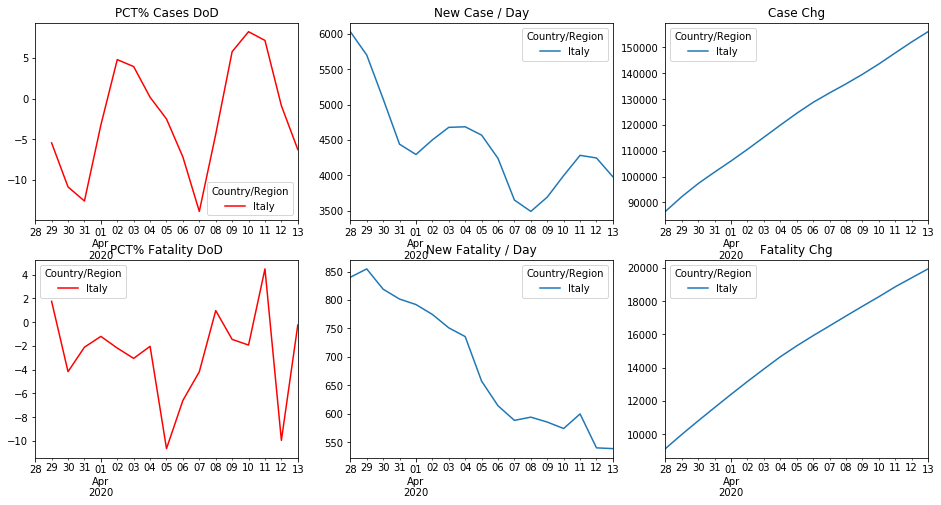

Country/Region,Italy
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,-0.054517
2020-03-30,-0.108713
2020-03-31,-0.126042
2020-04-01,-0.032658
2020-04-02,0.047963
2020-04-03,0.039399


Country/Region,Italy
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,0.017460
2020-03-30,-0.041732
2020-03-31,-0.021164
2020-04-01,-0.012058
2020-04-02,-0.021886
2020-04-03,-0.030551


In [614]:
# rolling 3 day to smooth out 
countries = ['Italy']
maxdays3 = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=False, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[0,2], title='Case Chg')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[1,2], title='Fatality Chg')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays))
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays))


# Rival Countries

Country/Region,India,Pakistan
2020-04-09,6725,4489
2020-04-10,7598,4695
2020-04-11,8446,5011
2020-04-12,9205,5230
2020-04-13,10453,5496


Country/Region,India,Pakistan
2020-04-09,226,65
2020-04-10,246,66
2020-04-11,288,86
2020-04-12,331,91
2020-04-13,358,93


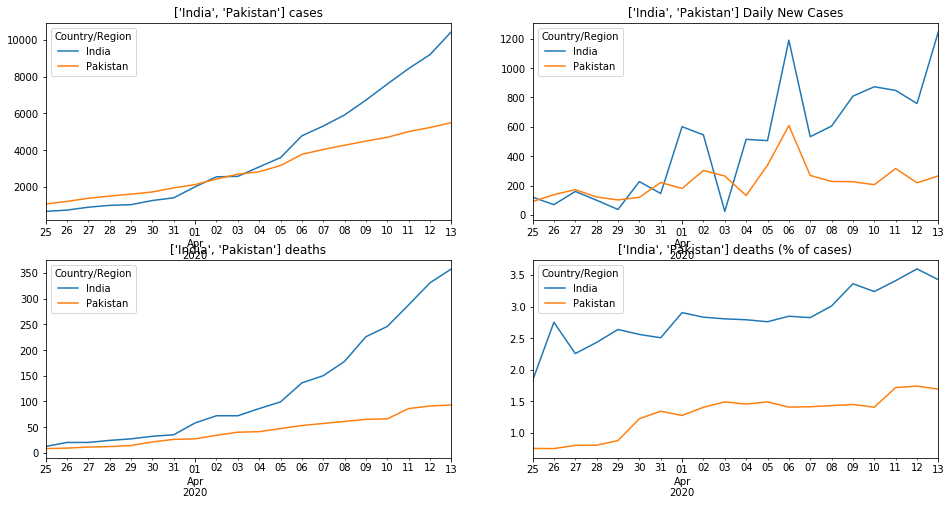

In [615]:
maxdays = 20
countries = ['India','Pakistan']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-09,24983,21903,3115
2020-04-10,26667,23249,3223
2020-04-11,28018,24571,3270
2020-04-12,29647,25746,3281
2020-04-13,30589,26710,3292


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-09,2523,2403,52
2020-04-10,3019,2520,54
2020-04-11,3346,2653,62
2020-04-12,3600,2747,66
2020-04-13,3903,2833,69


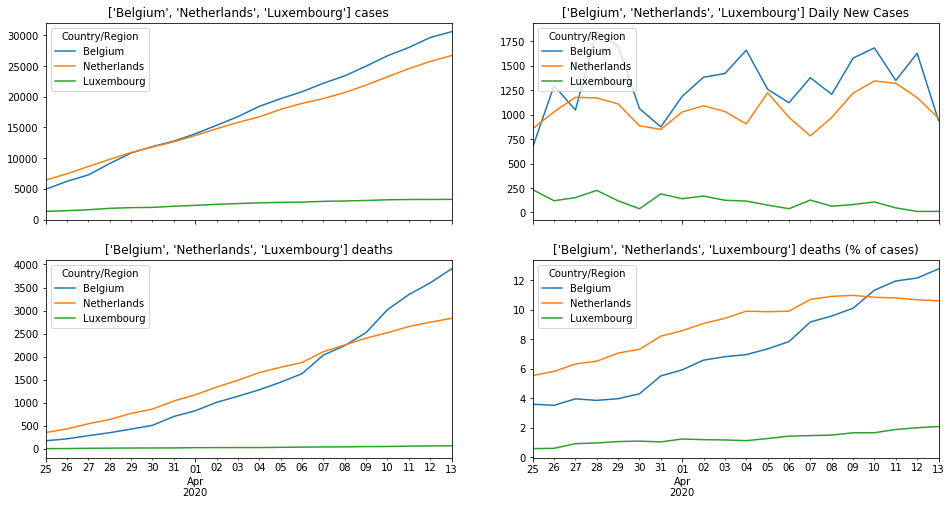

In [616]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-09,2605,6211,9141
2020-04-10,2769,6314,9685
2020-04-11,2905,6409,10151
2020-04-12,2974,6525,10483
2020-04-13,3064,6603,10948


Country/Region,Finland,Norway,Sweden
2020-04-09,42,108,793
2020-04-10,48,113,870
2020-04-11,49,119,887
2020-04-12,56,128,899
2020-04-13,59,134,919


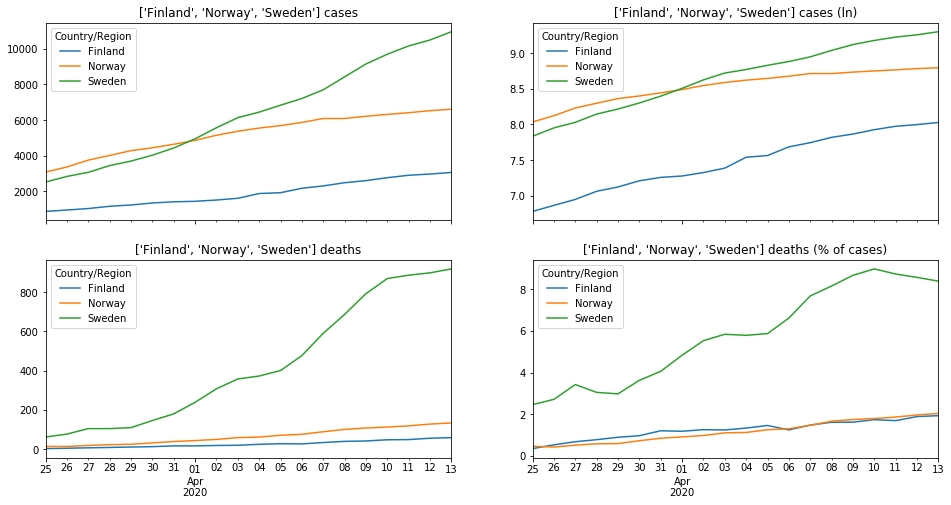

In [617]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].apply(np.log).tail(maxdays).plot(title=str(countries)+' cases (ln)', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


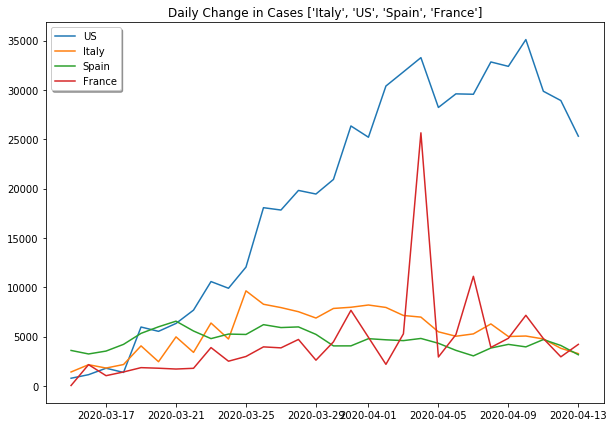

Country/Region,US,Spain,Italy,France
2020-04-09,32385.0,5002.0,4204.0,4822.0
2020-04-10,35098.0,5051.0,3951.0,7150.0
2020-04-11,29861.0,4754.0,4694.0,4796.0
2020-04-12,28917.0,3804.0,4092.0,2943.0
2020-04-13,25306.0,3268.0,3153.0,4205.0


In [618]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13
Country/Region,,,,,,,,,,
US,276067.0,307170.0,337531.0,366654.0,397314.0,428904.0,462341.0,494789.0,526081.0,554109.0
Spain,119144.0,125671.0,131496.0,136754.0,142279.0,147795.0,153238.0,158174.0,162710.0,166652.0
Italy,119900.0,124469.0,128709.0,132360.0,135852.0,139545.0,143542.0,147825.0,152070.0,156050.0
France,71993.0,83274.0,94528.0,100934.0,107662.0,114268.0,119557.0,125146.0,130109.0,134091.0
Germany,90682.0,95791.0,99863.0,103720.0,108111.0,113047.0,117883.0,121753.0,124978.0,127611.0
United Kingdom,38446.0,43201.0,47731.0,52221.0,56567.0,61098.0,67317.0,73450.0,79895.0,84883.0
China,82495.0,82552.0,82603.0,82662.0,82731.0,82803.0,82878.0,82946.0,83030.0,83120.0
Iran,53131.0,55717.0,58156.0,60438.0,62558.0,64465.0,66333.0,68147.0,69969.0,71673.0
Turkey,20997.0,23975.0,27073.0,30465.0,34184.0,38206.0,42512.0,47159.0,52051.0,56724.0


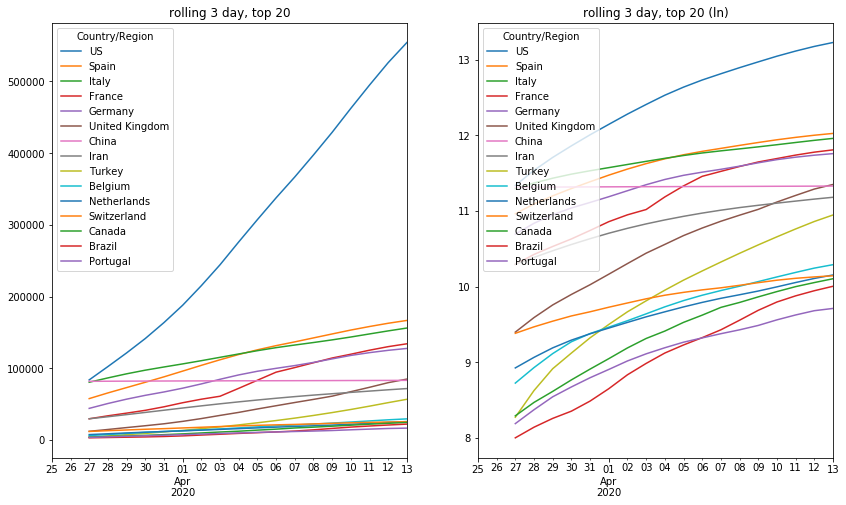

In [619]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [620]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.shape, df_gpop_2016.head(3), dfc_g.transpose().shape, dfc_g.tail(1).transpose().head(3))  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
df_gmerged = df_gmerged.rename(columns={df_gmerged.columns[1]:'Cases', 'Value':'Population'})
df_gmerged['% of pop'] = (df_gmerged['Cases'] / df_gmerged['Population']).mul(100).round(2)

display(df_gmerged.shape, df_gmerged.sort_values(by=['% of pop'], ascending=False).head())


(262, 4)

,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,406452690.0
113,Caribbean small states,CSS,2016,7245472.0
170,Central Europe and the Baltics,CEB,2016,102974082.0


(185, 83)

,2020-04-13
Country/Region,
US,580619
Spain,170099
Italy,159516


(291, 6)

,Country/Region,Cases,Country Code,Year,Population,% of pop
98,San Marino,356.0,SMR,2016.0,33203.0,1.07
84,Andorra,646.0,AND,2016.0,77281.0,0.84
41,Luxembourg,3292.0,LUX,2016.0,582972.0,0.56
57,Iceland,1711.0,ISL,2016.0,334252.0,0.51
1,Spain,170099.0,ESP,2016.0,46443959.0,0.37


C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


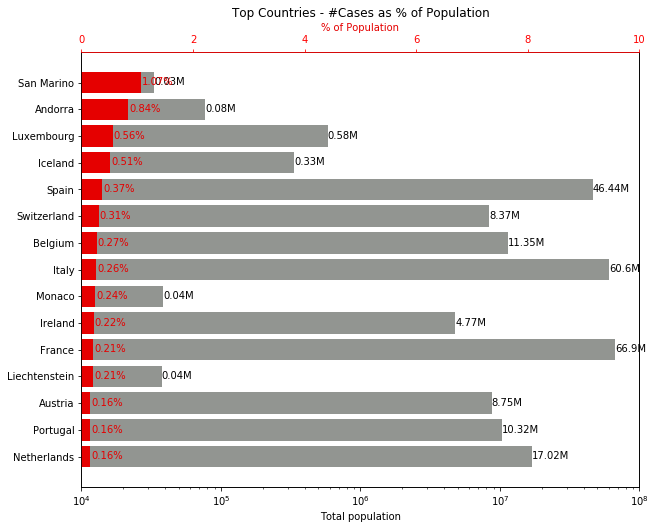

In [621]:
max_ctys = 15
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged.sort_values(by=['% of pop'],ascending=False).head(max_ctys)

ax1.set_xscale('log')
ax1.set(xlim=[10**4, 10**8])   # get max min +/- buffer
ax1.set_xlabel('Total population')  
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Population'], color='xkcd:grey')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['Population'].div(1000000).round(2).iloc[n:n+1].item()) + 'M', color='xkcd:black')

    
ax2 = ax1.twiny()
ax2.set_xscale('linear')
ax2.set(xlim=[0, 10])   # get max min +/- buffer
ax2.set_xlabel('% of Population', color='xkcd:red')  
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['% of pop'], color='xkcd:red')
for n,i in enumerate(ax2.patches):
    ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['% of pop'].iloc[n:n+1].item()) + '%', color='xkcd:red')
plt.title('Top Countries - #Cases as % of Population')
plt.gca().invert_yaxis()
plt.show()

# Emerging Markets (>100 cases)

In [622]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-11,04-11 %chg,04-12,04-12 %chg,04-13,04-13 %chg
Country/Region,,,,,,
Djibouti,187,25.0,214,14.0,298,39.0
Peru,6848,16.0,7519,10.0,9784,30.0
Bangladesh,482,14.0,621,29.0,803,29.0
Guinea,250,18.0,250,0.0,319,28.0
Oman,546,13.0,599,10.0,727,21.0
Bahrain,1040,12.0,1136,9.0,1361,20.0
Mali,87,0.0,105,21.0,123,17.0
Russia,13584,14.0,15770,16.0,18328,16.0
Singapore,2299,9.0,2532,10.0,2918,15.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,61,72,72,77,83,83,83,86,86,86
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,41,42,47,51,51,51,51,53,55,55
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,135,135,139,141,141,143,143,143,143,143
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,147,147,171,171,184,191,196,196,207,207
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,344,349,358,358,362,382,388,389,391,391
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,149,151,152,154,154,155,155,155,157,157
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,92839,98010,109069,112950,117749,124869,129654,132591,136779,136779


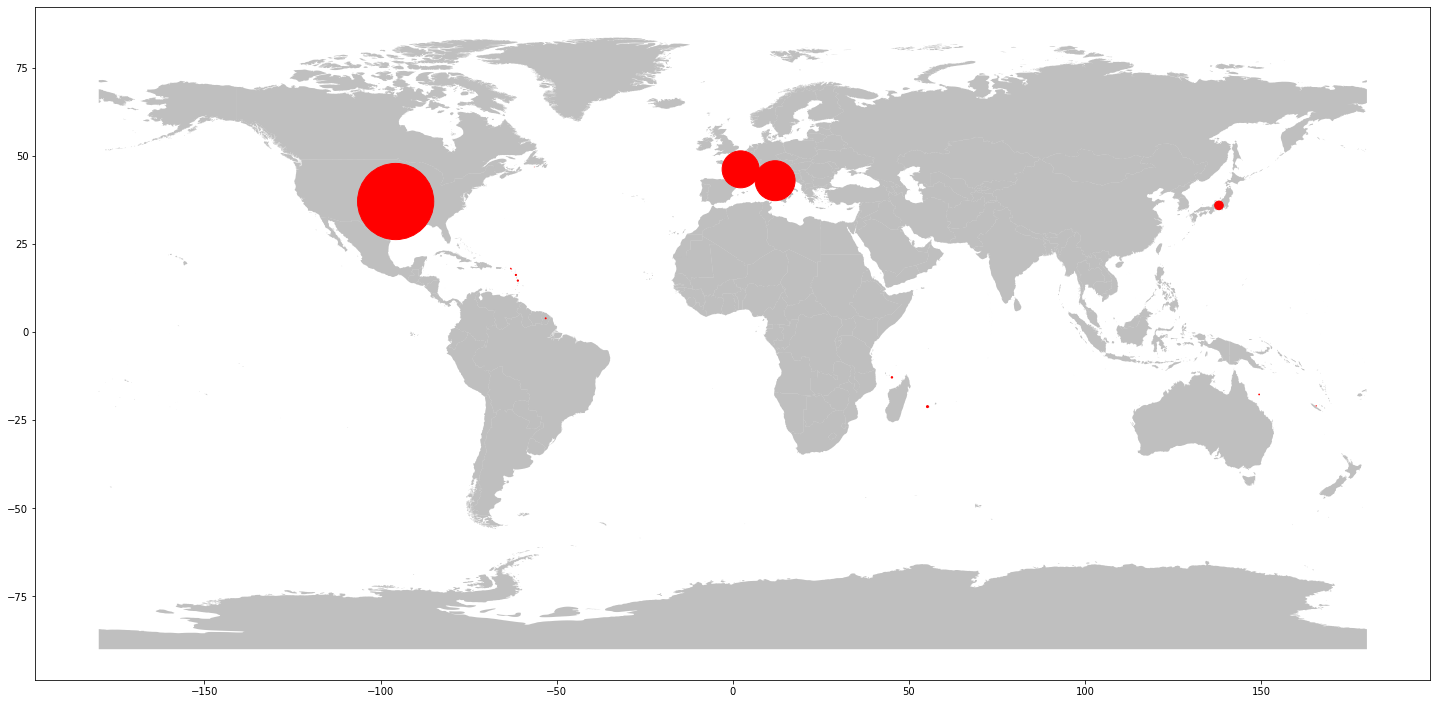

In [623]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
